In [1]:
import json
import random
#import balance
#import visualize
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from os import listdir
from os.path import isfile, join

In [2]:
def pickleDump(var, destination):
    f = open(destination,"wb")
    pickle.dump(var,f)
    f.close() 
    
    
def pickleLoad(path):
    file = open(path, 'rb')
    info = pickle.load(file)
    file.close()
    return info


In [3]:
with open('../data/template_ids.txt') as json_file:
    templ_ids_dict = json.load(json_file)
    
templ_ids = []

for i in templ_ids_dict:
    templ_ids.append(i)

In [4]:
infile = open('../data/video_lengths.pkl', 'rb')
LENGTHS = pickle.load(infile)
infile.close()

lengths = []
for v_id in LENGTHS:
    lengths.append(LENGTHS[v_id])
    
print(len(lengths))

9848


In [5]:
def getQA(d_path, v_id, group, balanced):
    with open('../exports/%s/%s/%s/%s.txt' % (d_path, balanced, group, v_id)) as json_file:
        QA = json.load(json_file)
    return QA
def getSTSGS(group):
    if group == 'train':
        return train_stsgs
    elif group == 'test':
        return test_stsgs
    else:
        print("INVALID GROUP", group)
        return
        

In [21]:

#infile = open('../data/videos_stsg.pkl', 'rb')
#infile = open('../data/stsgs/train_stsgs.pkl', 'rb')
#train_stsgs = pickle.load(infile)
#infile.close()
#
#infile = open('../data/stsgs/test_stsgs.pkl', 'rb')
#test_stsgs = pickle.load(infile)
#infile.close()

train_path = '../exports/dataset/balanced/train/'
train_stsgs = [f for f in listdir(train_path) if isfile(join(train_path, f))]
train_stsgs = [i[:5] for i in train_stsgs]
test_path = '../exports/dataset/balanced/test/'
test_stsgs = [f for f in listdir(test_path) if isfile(join(test_path, f))]
test_stsgs = [i[:5] for i in test_stsgs]


In [7]:

d_path = 'dataset'
#d_path = 'dataset'

In [18]:
# get num questions of different types (spend no longer than 30 min)


def notValid(q):
    sp = q['id'].split("-")
    
    if sp[1][3:11] == "Sequence":
        return True
    
    return False
    
def getMetrics(d_path, group, balanced):
    if type(balanced) == bool:
        print("non-bool balanced needed!")
        return
    
    answers = {}
    structurals = {}
    semantics = {}
    steps = {}
    
    stsgs = getSTSGS(group)
    cnt = 0
    for v_id in stsgs:
        if cnt % 100 == 0:
            print(cnt)
        cnt = cnt + 1
        QA = getQA(d_path, v_id, group, balanced)
        for q_obj in QA:
            q = QA[q_obj]
            if notValid(q):
                continue
            ans = str(q['answer'])
            struct = q['attributes']['structural']
            sem = q['attributes']['semantic']

            if sem == "rel":
                sem == "relation"

            step = str(q['steps'])
            #print(q['id'], ans)

            if ans not in answers:
                answers[ans] = 0


            if struct not in structurals:
                structurals[struct] = 0


            if sem not in semantics:
                semantics[sem] = 0


            if step not in steps:
                steps[step] = 0

            answers[ans] = answers[ans] + 1
            structurals[struct] = structurals[struct] + 1
            semantics[sem] = semantics[sem] + 1
            steps[step] = steps[step] + 1
    return answers, structurals, semantics, steps


#answers_a, structurals_a, semantics_a, steps_a = getMetrics(QA_a)

#answers_b, structurals_b, semantics_b, steps_b = getMetrics(QA_b)


#answers_tr_a, structurals_tr_a, semantics_tr_a, steps_tr_a = getMetrics(d_path, 'train', False)
#answers_tr_b, structurals_tr_b, semantics_tr_b, steps_tr_b = getMetrics(d_path, 'train', True)

#answers_te_a, structurals_te_a, semantics_te_a, steps_te_a = getMetrics(d_path, 'test', False)
#answers_te_b, structurals_te_b, semantics_te_b, steps_te_b = getMetrics(d_path, 'test', True)



In [19]:

bny = {
    'objExists': 0,
    'objRelExists': 0,
    'relExists': 0,
    'actExists': 0,
    'andObjRelExists': 0,
    'xorObjRelExists': 0,
    'objFirstVerify': 0,
    'objLastVerify': 0,
    'actTime': 0,
    'relTime': 0,
    'objTime': 0,
    'actLengthLongerVerify': 0,
    'actLengthShorterVerify': 0,
    'actCountChooseMore': 0,
    'actCountChooseFewer': 0,
    'actLengthLongerChoose': 0,
    'actLengthShorterChoose': 0,
    'objFirstChoose': 0,
    'objLastChoose': 0,
    'objWhatChoose': 0,
}
    
opn = {
    'objWhat': 0,
    'objWhatGeneral': 0,
    'objFirst': 0,
    'relFirst': 0,
    'objLast': 0,
    'relLast': 0,
    'actCount': 0,
}

def total(dic):
    tot = 0
    for i in dic:
        tot = tot + dic[i]
    return tot

def perc(num, denom):
    return round(num / denom, 4)

In [10]:
# Random chance if guess most common per template
##def getQATemplBal(d_path, v_id, group):
#    with open('../exports/%s/templ_balanced/%s/%s.txt' % (d_path, group, v_id)) as json_file:
#        QA = json.load(json_file)
#    return QA
    
def byTemplate(group, d_path, balanced):
    v_ids = list(getSTSGS(group))
    
    by_templ = {}
    
    for v_id in v_ids:
        QA = getQA(d_path, v_id, group, balanced)
        
        for q_id in QA:
            q = QA[q_id]
            ans = q['answer']
            templ = q['attributes']['type']
            
            if templ not in by_templ: 
                by_templ[templ] = {}
            if ans not in by_templ[templ]:
                by_templ[templ][ans] = 0
            by_templ[templ][ans] += 1
            
    return by_templ
    
#by_templ_te = byTemplate('test', 'dataset', 'all')

In [11]:
def findMax(ans):
    mx = -1
    tot = 0
    
    for a in ans:
        cnt = ans[a]
        tot = tot + cnt
        if cnt > mx:
            mx = cnt
                
    return mx, tot

def sumDic(dic): 
    total = 0
    for a in dic:
        total += dic[a]
        
def randomChance(preds):
    ans = {}
    for pred in preds:
        a = pred['answer']
        if a not in ans:
            ans[a] = 0
        ans[a] += 1
        
    return findMax(ans)
    
def randomChanceByTempl(by_templ):
    
    rand = {}
    for t in by_templ:
        mx, tot = findMax(by_templ[t])
        perc = round(mx / tot, 3)
        
       # if tot_b == 0:
       #     perc_b = "None"
       # else: 
        #    perc_b = round(mx_b / tot_b, 3)
        #    
       # if tot_o == 0:
       #     perc_o = "None"
       # else: 
       #     perc_o = round(mx_o / tot_o, 3)
            
            
            
        rand[t] = (perc, mx, tot)
        
    return rand
        
def sums(dic):
    tot = 0
    for i in dic:
        tot += dic[i]
    return tot
#rand_t = randomChanceByTempl(ans_by_templ)

In [12]:
by_templ_te = byTemplate('train', 'dataset', 'balanced')
rand = randomChanceByTempl(by_templ_te)

tot_perc_b = 0
num_b = 0
tot_perc_o = 0
num_o = 0
for t in rand:
    percent, _, _ = rand[t]
    if t in bny: 
        num_b += 1
        tot_perc_b += percent
    
    elif t in opn: 
        num_o += 1
        tot_perc_o += percent
        
    else:
        print("t in neither", t)
        

        
print("Random per binary", perc(tot_perc_b, num_b))
print("Random per open", perc(tot_perc_o, num_o))
rand

t in neither actWhatBefore
t in neither actFirst
t in neither actLast
t in neither actWhatAfterAll
t in neither actShortest
t in neither actLongest
Random per binary 0.3798
Random per open 0.1862


{'objExists': (0.5, 34787, 69574),
 'objRelExists': (0.5, 34730, 69460),
 'relExists': (0.5, 34800, 69600),
 'actExists': (0.5, 34713, 69426),
 'andObjRelExists': (0.5, 34408, 68816),
 'xorObjRelExists': (0.5, 34217, 68434),
 'objWhatGeneral': (0.096, 2441, 25529),
 'objWhat': (0.119, 133100, 1115045),
 'actWhatBefore': (0.092, 109, 1182),
 'objFirst': (0.123, 11333, 92221),
 'objFirstChoose': (0.089, 12434, 139064),
 'objFirstVerify': (0.5, 34802, 69604),
 'actFirst': (0.04, 177, 4397),
 'objLast': (0.093, 13650, 146703),
 'objLastChoose': (0.07, 9659, 138486),
 'objLastVerify': (0.5, 34788, 69576),
 'actLast': (0.074, 80, 1074),
 'relTime': (0.5, 77220, 154440),
 'objWhatChoose': (0.056, 7611, 135722),
 'actTime': (0.5, 112611, 225222),
 'actLengthLongerChoose': (0.061, 572, 9350),
 'actLengthShorterChoose': (0.061, 572, 9350),
 'actLengthLongerVerify': (0.5, 4675, 9350),
 'actLengthShorterVerify': (0.5, 4675, 9350),
 'actWhatAfterAll': (0.062, 221, 3541),
 'actShortest': (0.144, 60,

In [12]:
d_path = 'dataset'

In [13]:
filenames = ['answers', 'structurals', 'semantics', 'steps']

In [22]:
answers_tr_a, structurals_tr_a, semantics_tr_a, steps_tr_a = getMetrics(d_path, 'train', 'all')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700


In [17]:


sums(answers_tr_a)#, sums(answers_te_a), sums(answers_tr_a) + sums(answers_te_a), len(answers_tr_a),

132342240

In [36]:

sums(answers_tr_b), sums(answers_te_b), sums(answers_tr_b) + sums(answers_te_b), len(answers_tr_b),

(1302055, 607120, 1909175, 208)

In [23]:

train_all = [answers_tr_a, structurals_tr_a, semantics_tr_a, steps_tr_a]

for i in range(len(train_all)):
    dist = train_all[i]
    filename = filenames[i]
    pickleDump(dist, '../exports/%s/statistics/all/train/%s.pkl' % (d_path, filename))

In [20]:
answers_tr_a = []
structurals_tr_a = []
semantics_tr_a = []
steps_tr_a = []

In [22]:
#d_path = 'dataset before 11-4'
answers_tr_b, structurals_tr_b, semantics_tr_b, steps_tr_b = getMetrics(d_path, 'train', 'balanced')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000


In [23]:
sums(answers_tr_b)

1441052

In [24]:
total_a = 0
total_b = 0
for i in answers_tr_a:
    total_a = total_a + answers_tr_a[i]
    total_b = total_b + answers_tr_b[i]
total_a, total_b, total_a - total_b

# Ok so this worked ! but then why doesn't it transfer?

NameError: name 'answers_tr_a' is not defined

In [25]:
train_b = [answers_tr_b, structurals_tr_b, semantics_tr_b, steps_tr_b]

for i in range(len(train_b)):
    dist = train_b[i]
    filename = filenames[i]
    pickleDump(dist, '../exports/%s/statistics/balanced/train/%s.pkl' % (d_path, filename))

In [26]:
answers_tr_b = []
structurals_tr_b = []
semantics_tr_b = []
steps_tr_b = []

In [ ]:
answers_te_a, structurals_te_a, semantics_te_a, steps_te_a = getMetrics(d_path, 'test', 'all')

In [ ]:
test_a = [answers_te_a, structurals_te_a, semantics_te_a, steps_te_a]

for i in range(len(test_a)):
    dist = test_a[i]
    filename = filenames[i]
    pickleDump(dist, '../exports/%s/statistics/all/test/%s.pkl' % (d_path, filename))
    
sums(answers_te_a)

In [1]:
d_path = 'dataset'

In [27]:
bal_text = 'balanced'
stat = 'semantics'
structurals_tr = pickleLoad('../exports/%s/statistics/%s/train/%s.pkl' % (d_path, bal_text, stat))
structurals_te = pickleLoad('../exports/%s/statistics/%s/test/%s.pkl' % (d_path, bal_text, stat))

FileNotFoundError: [Errno 2] No such file or directory: '../exports/dataset/statistics/balanced/test/semantics.pkl'

In [30]:
for i in structurals_te:
    print(i, structurals_te[i] + structurals_tr[i])

print("relation", structurals_te['relation'] + structurals_tr['relation'] + structurals_te['objrel'] + structurals_tr['objrel'])

object 3698081
objrel 367454
relation 351812
action 1087839
relation 719266


In [28]:
dataset = 'dataset'
answers_te_b, structurals_te_b, semantics_te_b, steps_te_b = getMetrics(d_path, 'test', 'balanced')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


In [29]:
test_b = [answers_te_b, structurals_te_b, semantics_te_b, steps_te_b]

for i in range(len(test_b)):
    dist = test_b[i]
    filename = filenames[i]
    pickleDump(dist, '../exports/%s/statistics/balanced/test/%s.pkl' % (d_path, filename))

In [30]:
dataset = 'dataset'
answers_te_b2, structurals_te_b2, semantics_te_b2, steps_te_b2 = getMetrics(d_path, 'test', 'balanced_attempt2')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


In [23]:
sums(answers_te_b)

5132143

In [32]:
structurals_te_a, sums(structurals_te_a)

({'verify': 43462054,
  'logic': 61222220,
  'query': 2399988,
  'choose': 6486687,
  'compare': 10238496},
 123809445)

In [51]:
for i in structurals_tr_b:
    print(i, structurals_tr_b[i], structurals_tr_b[i] / sums(structurals_tr_b))

structurals_tr_b, sums(structurals_tr_b)

verify 377074 0.10047815015790892
logic 187300 0.049909454177631825
query 1887374 0.5029247526377666
choose 374982 0.09992069912673111
compare 926066 0.2467669438999615


({'verify': 377074,
  'logic': 187300,
  'query': 1887374,
  'choose': 374982,
  'compare': 926066},
 3752796)

In [46]:
for i in structurals_te_b:
    print(i, structurals_te_b[i], structurals_te_b[i] / sums(structurals_te_b))

structurals_te_b, sums(structurals_te_b)

verify 177394 0.10122974908553461
logic 87778 0.050090447902578765
query 888746 0.5071622184559373
choose 174278 0.09945160609225115
compare 424194 0.24206597846369815


({'verify': 177394,
  'logic': 87778,
  'query': 888746,
  'choose': 174278,
  'compare': 424194},
 1752390)

In [34]:
structurals_te_b2, sums(structurals_te_b2)

({'verify': 266922,
  'logic': 131440,
  'query': 1336203,
  'choose': 1955760,
  'compare': 2329698},
 6020023)

In [41]:
2329698 - (4481004 * 2)

-6632310

In [ ]:
# it  had a lot for compare and choose, so probs want to keep the dict thing in? maybe thats a part of the problem

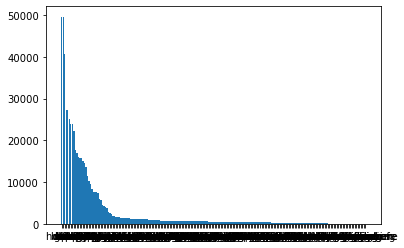

In [25]:
answers_te_b

import matplotlib.pyplot as plt

info = [(i, answers_te_b[i]) for i in answers_te_b]

info_sort = sorted(info, key=lambda x: x[1], reverse=True)

x = [i[0] for i in info_sort]

y = [i[1] for i in info_sort]

plt.bar(x, y)
plt.show()

# Get number stats


In [45]:
# number of training and test questions

total_balanced = 0
total_all = 0

for i in answers_te_b:
    total_balanced = total_balanced + answers_te_b[i]
    
total_balanced_te = total_balanced

for i in answers_tr_b:
    total_balanced = total_balanced + answers_tr_b[i]
    
total_balanced_tr = total_balanced - total_balanced_te
    
#for i in answers_te_a:
#    total_all = total_all + answers_te_a[i]

#total_all_te = total_all
    
#for i in answers_tr_a:
#    total_all = total_all + answers_tr_a[i]
    
#total_all_tr = total_all - total_all_te

print("ALL Questions")
#print("Train: ", total_all_tr)
#print("Test: ", total_all_te)
#print("Combined: ", total_all)
print()

print("Balanced")
print("Train: ", total_balanced_tr)
print("Test: ", total_balanced_te)
print("Combined: ", total_balanced)
print()

ALL Questions

Balanced
Train:  17441091
Test:  9637972
Combined:  27079063



In [22]:
# average number of stps
total_steps = 0
total_qs = 0
for i in steps_te_b:
    print(i, steps_te_b[i])
    total_qs = total_qs + steps_te_b[i] + steps_tr_b[i]
    total_steps = total_steps + (int(i) * steps_te_b[i]) + (int(i) * steps_tr_b[i])
total_steps, total_qs, total_steps / total_qs

3 2525003
1 120572
4 2681968
2 58217
5 2106482
6 4024422
7 6960471
8 3051309
9 53799
10 187


(349792757, 61884257, 5.652370634424843)

# Get answer distribution by ans type

In [15]:
answers_te_b = pickleLoad('../exports/%s/statistics/balanced/test/%s.pkl' % (d_path, 'answers'))
answers_tr_b = pickleLoad('../exports/%s/statistics/balanced/train/%s.pkl' % (d_path, 'answers'))
answers_te_a = pickleLoad('../exports/%s/statistics/all/test/%s.pkl' % (d_path, 'answers'))
answers_tr_a = pickleLoad('../exports/%s/statistics/all/train/%s.pkl' % (d_path, 'answers'))

In [46]:
import grammar as g
IDX = pickleLoad('../data/IDX.pkl')
ans_by_type = {
    'objects': {},
    'relations': {},
    'actions': {}, 
}
for ans in answers_tr_b:
    if ans in ['Yes', 'No', 'before', 'after', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '16', '7']:
        continue
    tp = g.vType(IDX[ans])
    if tp in ['attention', 'spatial', 'contact', 'verb']:
        tp = 'relations'
        
    ans_by_type[tp][ans] = answers_tr_b[ans]

In [66]:
tot_test = 0

for i in answers_te_b:
    tot_test += answers_te_b[i]
    
tot_train = 0

for i in answers_tr_b:
    tot_train += answers_tr_b[i]

In [69]:
sorted_test = sorted(answers_tr_b.items(), key=lambda x: x[1], reverse=True)

sorted_test = [(a, round(cnt / tot_train, 4)) for a, cnt in sorted_test]

sorted_test

[('Yes', 0.3687),
 ('No', 0.3687),
 ('bed', 0.0267),
 ('chair', 0.0262),
 ('table', 0.0197),
 ('cup', 0.0185),
 ('blanket', 0.0139),
 ('food', 0.0133),
 ('1', 0.0116),
 ('clothes', 0.0108),
 ('before', 0.0099),
 ('after', 0.0099),
 ('closet', 0.0093),
 ('book', 0.0089),
 ('doorway', 0.0089),
 ('pillow', 0.0067),
 ('bag', 0.0067),
 ('door', 0.0063),
 ('phone', 0.0049),
 ('box', 0.0045),
 ('laptop', 0.004),
 ('shoe', 0.0039),
 ('doorknob', 0.0026),
 ('refrigerator', 0.0025),
 ('broom', 0.0024),
 ('mirror', 0.0022),
 ('window', 0.002),
 ('floor', 0.002),
 ('light', 0.0015),
 ('television', 0.0014),
 ('medicine', 0.0013),
 ('2', 0.0012),
 ('holding some food', 0.0011),
 ('holding a cup of something', 0.001),
 ('vacuum', 0.0009),
 ('putting some food somewhere', 0.0009),
 ('picture', 0.0008),
 ('putting a cup somewhere', 0.0006),
 ('holding a book', 0.0004),
 ('sitting in a chair', 0.0004),
 ('standing up', 0.0004),
 ('eating something', 0.0004),
 ('sitting at a table', 0.0004),
 ('taking f

In [70]:
sorted_test = sorted(answers_te_b.items(), key=lambda x: x[1], reverse=True)

sorted_test = [(a, round(cnt / tot_test, 4)) for a, cnt in sorted_test]

sorted_test

[('Yes', 0.3627),
 ('No', 0.3627),
 ('bed', 0.0328),
 ('chair', 0.0212),
 ('table', 0.0206),
 ('cup', 0.0192),
 ('blanket', 0.0164),
 ('closet', 0.0145),
 ('food', 0.0137),
 ('clothes', 0.0135),
 ('book', 0.0112),
 ('doorway', 0.0084),
 ('1', 0.008),
 ('bag', 0.0079),
 ('door', 0.0068),
 ('box', 0.0058),
 ('pillow', 0.0057),
 ('before', 0.0057),
 ('after', 0.0057),
 ('shoe', 0.0049),
 ('doorknob', 0.0045),
 ('laptop', 0.0043),
 ('phone', 0.0039),
 ('mirror', 0.0022),
 ('refrigerator', 0.0022),
 ('floor', 0.0021),
 ('broom', 0.002),
 ('window', 0.002),
 ('light', 0.0015),
 ('2', 0.0015),
 ('medicine', 0.0015),
 ('holding a book', 0.0014),
 ('television', 0.0013),
 ('holding a cup of something', 0.0013),
 ('holding some food', 0.0012),
 ('picture', 0.001),
 ('putting some food somewhere', 0.0009),
 ('sitting in a bed', 0.0007),
 ('putting a cup somewhere', 0.0006),
 ('vacuum', 0.0006),
 ('holding a blanket', 0.0005),
 ('putting something on a table', 0.0005),
 ('tidying up a table', 0.00

In [54]:
def binary(a):
    return a in ['Yes', 'No', 'before', 'after']
        
def randomChance(ans):
    tot_b = 0
    tot_o = 0
    mx_b = -1
    mx_o = -1
    
    for a in ans:
        cnt = ans[a]
        
        if binary(a):
            tot_b += cnt
            if cnt > mx_b:
                mx_b = cnt
        else:
            tot_o += cnt
            if cnt > mx_o:
                mx_o = cnt
                
    return mx_b, tot_b, mx_o, tot_o


print("Train Set")
mx_b, tot_b, mx_o, tot_o = randomChance(answers_tr_b)
print(mx_b, tot_b, mx_o, tot_o)

print("Random Chance Binary", mx_b / tot_b)
print("Random Chance Open", mx_o / tot_o)

print()
print("Test Set")
mx_b, tot_b, mx_o, tot_o = randomChance(answers_te_b)
print(mx_b, tot_b, mx_o, tot_o)

print("Random Chance Binary", mx_b / tot_b)
print("Random Chance Open", mx_o / tot_o)


Train Set
6431111 13207078 466162 4234013
Random Chance Binary 0.48694427336614504
Random Chance Open 0.11009933129633755

Test Set
3495746 7101208 315927 2536764
Random Chance Binary 0.4922748354927781
Random Chance Open 0.12453937378486923


In [40]:
pickleDump(ans_by_type, '../exports/%s/statistics/balanced/train/answers-by-type.pkl' % (d_path))

In [18]:
tot_actCount = 0
for ans in answers_te_b:
    if ans.isnumeric():
        tot_actCount += answers_te_b[ans]
        
tot_actCount

92597

In [19]:
352519 + 2220 - 92597

262142

In [10]:
struct_te_b = pickleLoad('../exports/%s/statistics/balanced/test/%s.pkl' % (d_path, 'structurals'))
struct_tr_b = pickleLoad('../exports/%s/statistics/balanced/train/%s.pkl' % (d_path, 'structurals'))

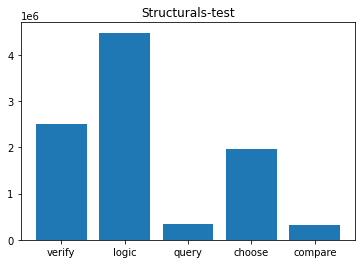

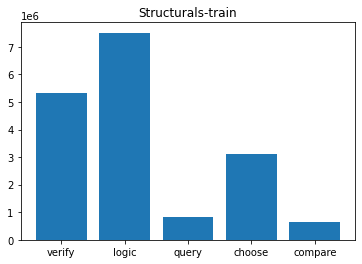

In [11]:
import visualize
def vis(dic, title):
    data = []
    for a in dic:
        data.append((a, dic[a]))

    visualize.visualize(data, None, title, True, None)

vis(struct_te_b, 'Structurals-test')
vis(struct_tr_b, 'Structurals-train')

In [13]:
total = 0
for s in struct_te_b:
    total = total + struct_te_b[s]
    
for s in struct_te_b:
    print(s)
    print(round(struct_te_b[s] / total, 4) *100)
    print(struct_te_b[s])
    print()

verify
25.97
2503106

logic
46.48
4479926

query
3.66
352519

choose
20.47
1973215

compare
3.42
329206



# Get by template


In [14]:
templates_train = {}
for i in templ_ids:
    templates_train[i] = 0
    
threshold = 30
length_train = {
    'less': [],
    'more': [],
}

steps_train = {}

for i in range(20):
    steps_train[i] = []

print("Do training")
cnt = 0
for v_id in train_stsgs:
    if cnt % 100 == 0:
        print(cnt)
    cnt = cnt + 1
    QA = getQA('dataset', v_id, 'train', True)
    vid_steps = {}
    for i in range(20):
        vid_steps[i] = []
    for q_id in QA:
        q = QA[q_id]
        t_id = q['attributes']['type']
        templates_train[t_id] = templates_train[t_id] + 1
        q_steps = q['steps']
        vid_steps[q_steps].append(q_id)
        
    for num in vid_steps:
        steps_train[num].append(vid_steps[num])
        
    
        # add in steps here
    
    length = LENGTHS[v_id]
    q_ids = list(QA.keys())
        
    if length < threshold:
        #length_train['less'] = length_train['less'] + q_ids
        length_train['less'].append(q_ids)
    else:
        #length_train['more'] = length_train['more'] + q_ids
        length_train['more'].append(q_ids)
            


Do training
0
100
200
300
400
500
600
700
800
900
1000
1100
1200


KeyboardInterrupt: 

In [68]:

templates_test = {}
for i in templ_ids:
    templates_test[i] = 0
    
length_test = {
    'less': [],
    'more': [],
}


steps_test = {}

for i in range(20):
    steps_train[i] = []
    steps_test[i] = []

print("Do testing")
cnt = 0
for v_id in test_stsgs:
    if cnt % 100 == 0:
        print(cnt)
    cnt = cnt + 1
    QA = getQA('dataset', v_id, 'test', True)
    vid_steps = {}
    for i in range(20):
        vid_steps[i] = []
    for q_id in QA:
        q = QA[q_id]
        t_id = q['attributes']['type']
        templates_test[t_id] = templates_test[t_id] + 1
        q_steps = q['steps']
        vid_steps[q_steps].append(q_id)
        
    for num in vid_steps:
        steps_test[num].append(vid_steps[num])
        
    
        # add in steps here
    
    length = LENGTHS[v_id]
    q_ids = list(QA.keys())
        
    if length < threshold:
        length_test['less'].append(q_ids)
    else:
        length_test['more'].append(q_ids)

Do testing
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


In [48]:
def concatDic(dic):
    newDic = {}
    
    for key in dic:
        newDic[key] = []
        for lst in dic[key]:
            newDic[key] = newDic[key] + lst
    return newDic

concat_length_train = concatDic(length_train)

In [51]:
concat_length_test = concatDic(length_test)

In [43]:
pickleDump(templates_train, '../exports/dataset/statistics/balanced/train/templates.pkl')
pickleDump(templates_test, '../exports/dataset/statistics/balanced/test/templates.pkl')

In [72]:
#pickleDump(concat_length_train, '../exports/dataset/metrics/balanced/train/concat_lengths.pkl')
#pickleDump(concat_length_test, '../exports/dataset/metrics/balanced/test/concat_lengths.pkl')

In [71]:
#pickleDump(length_train, '../exports/dataset/metrics/balanced/train/lengths.pkl')
#pickleDump(length_test, '../exports/dataset/metrics/balanced/test/lengths.pkl')

In [47]:
pickleDump(steps_train, '../exports/dataset/metrics/balanced/train/steps.pkl')
pickleDump(steps_test, '../exports/dataset/metrics/balanced/test/steps.pkl')

In [59]:
for cat in steps_test:
    print(cat, len(steps_test[cat]))
    for i in steps_test[6]:
        print(len(i))
        
    break
    
for cat in steps_test:
    print(cat, len(steps_train[cat]))
    for i in steps_test[6]:
        print(len(i))

0 1814
34
5309
255
0
6419
42
11827
19
2124
238
29
12221
962
45
2676
8268
9381
6639
126
4557
7524
763
13635
202
470
14485
178
443
939
1739
2034
2033
331
2042
447
1467
344
24
5268
4432
72
7696
98
1209
8311
733
4208
2135
98
178
0
1141
2634
315
659
167
2838
177
9
847
617
593
3042
31
2419
1112
8040
22
2344
1091
2201
14
5475
81
1
61
510
1984
19
799
1466
2021
8
4563
994
1371
441
1386
18361
1050
1254
1584
1451
1651
1610
512
3801
39
382
401
1680
974
1283
83
2672
1599
1997
1716
8
321
619
1963
290
912
2376
1055
4925
579
1942
68
0
4
1673
4054
6111
64
3906
254
71
1863
4156
3350
2364
2595
11
1067
676
678
1072
4369
0
5522
467
55
1332
2422
6452
38
363
524
1137
2155
298
27
511
1164
1666
1224
1608
3055
1337
4970
9764
43
1346
37
2707
3542
134
238
2524
2246
335
151
1598
5540
1872
2153
168
15
2197
969
244
2512
727
8067
1675
1145
0
0
54
563
2361
0
3880
927
151
2205
133
0
323
1428
7404
306
5133
163
1712
2803
32
647
214
3255
1096
8103
44
2414
15470
9003
15323
29
1506
67
1714
13140
2496
3275
4
859
2160
4920
14

In [66]:
steps_train = pickleLoad('../exports/dataset/metrics/balanced/train/steps.pkl')
steps_test = pickleLoad('../exports/dataset/metrics/balanced/test/steps.pkl')

In [67]:
def concatSteps(dic): 
    newDic = {}
    
    for cat in dic:
        newDic[cat] = 0
        for lst in dic[cat]:
            newDic[cat] = newDic[cat] + len(lst)
            
    return newDic

steps_test_concat = concatSteps(steps_test)
steps_test_concat

TypeError: 'int' object is not iterable

# Visualization ideas

Horizontal with names of most and least popular in the horz axis
Show horz distribution for balancing to show progression, but also a bunch of stacked bars. will have to see to what extend want to do stacked. 

(note for next one)

Comparisons with other datasets?

In [250]:
print(semantics_a)
print(semantics_b)

total = 0
for i in semantics_a:
    total = total + semantics_a[i]

total

{'object': 1662436, 'objrel': 3956453, 'relation': 362788, 'action': 1094744}
{'object': 1075598, 'objrel': 1883309, 'relation': 172195, 'action': 634503}


7076421

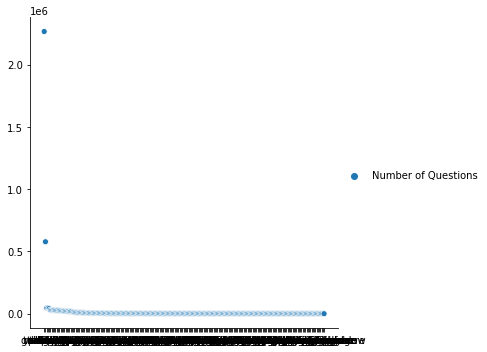

In [195]:
def getDataframeFromLengths(lengths):
    #for i in lengths:
    #    print(type(i), type(lengths[i]))
    #    break
    df = pd.DataFrame.from_dict(lengths, orient="index")
    df.columns = ['Number of Questions']
    df.sort_values(by=['Number of Questions'], inplace=True, ascending=False)
    return df

def getVisualizableDictCounts(path, dic):
    if path is not None:
        with open(path) as json_file:
            dic = json.load(json_file)
    lengths = {}
    for idx in dic:
        lengths[idx] = len(dic[idx])

    #return getDataframeFromLengths(lengths)
    #return lengths
    return dic

if False: 
    for path in paths:
        df = getVisualizableDictCounts(paths[path], None)
        g = sns.relplot(data=df)
        g.fig.suptitle(path)
    
if False:
    for dic in [structurals, semantics, steps]:
        df = getDataframeFromLengths(dic)
        g = sns.relplot(data=df)
        g.fig.suptitle("Title")
    
    
if False:
    sns.distplot(lengths, hist=False, rug=False)
    
if True:
    ans_lens = []
    for ans in answers:
        ans_lens.append(answers[ans])
        answers[ans] = int(answers[ans])
    df_1 = getDataframeFromLengths(answers)
    df_2 = getDataframeFromLengths(structurals)
    #df_1 = pd.DataFrame.from_dict(answers, orient="index")
    #df_2 = pd.DataFrame.from_dict(structurals, orient="index")
    #print(df_1.iloc[0])
    #print(df_2.iloc[0])

    g = sns.relplot(data=df_1)
    #g.fig.suptitle("Answer Distribution")
    #print(ans_lens)
    #g = sns.distplot(ans_lens, hist=False, rug=False)

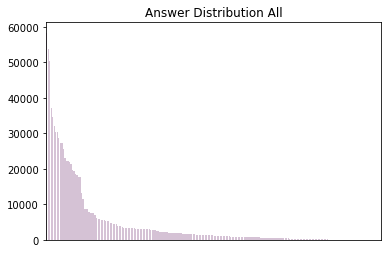

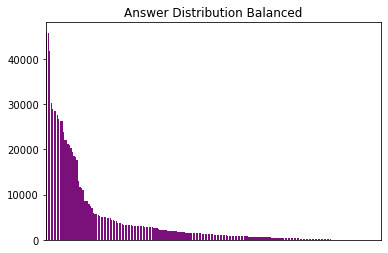

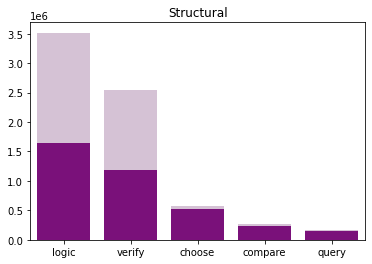

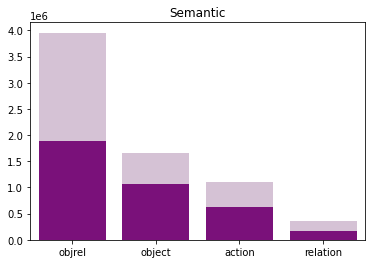

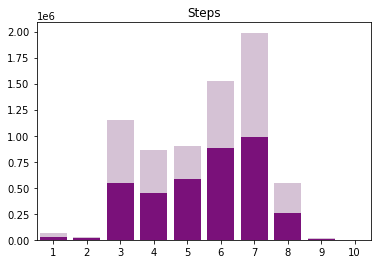

length


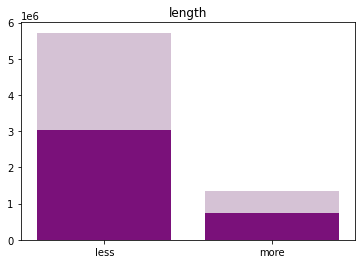

global


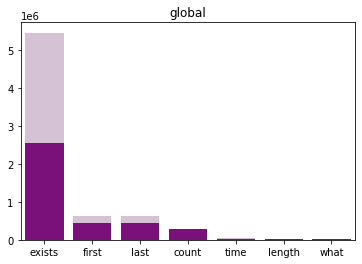

answer_type


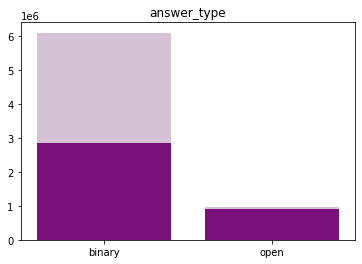

novel_compositions


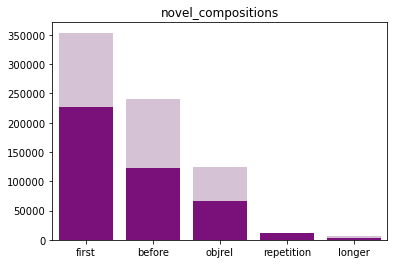

<Figure size 432x288 with 0 Axes>

In [247]:
# Overall Answer Distribution
# answers = answers {answer : number}

def getSortedXandY(dic, first_num, sort_by_val, is_lengths): 
    if sort_by_val:
        for val in dic:
            if is_lengths:
                sort = sorted(dic, key=dic.__getitem__)[::-1]
            else:
                sort = sorted(dic, key=lambda k: len(dic[k]))[::-1]
    else:
        dic = {int(k):int(v) for k,v in dic.items()}
        sort = sorted(dic)
    x = []
    y = []
    
    for i in sort:
        x.append(i)
        val = dic[i]
        if is_lengths:
            y.append(int(dic[i]))
        else:
            y.append(len(dic[i]))
    return x[first_num:], y[first_num:]

def getXandYAlreadySorted(sort, dic, first_num, is_lengths):
    x = []
    y = []
    
    for i in sort:
        x.append(i)
        val = dic[i]
        if is_lengths:
            y.append(int(dic[i]))
        else:
            y.append(len(dic[i]))
    return x[first_num:], y[first_num:]

def removeXAxis(plt):
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
def visualizeBarPlot(x, y, title, color, x_axis, newFig):
    plt.title(title)
    sns.barplot(x=x, y=y, color=color)
    if not x_axis:
        removeXAxis(plt)
    if newFig:
        plt.show()
        plt.clf()

x_a, y_a = getSortedXandY(answers_a, 2, True, True)
x_b, y_b = getSortedXandY(answers_b, 2, True, True)
# Note, idk if these are the same ordering of x axis values, but its still the distribution

color_a = 'thistle'
color_b = 'darkmagenta'
visualizeBarPlot(x_a, y_a, "Answer Distribution All", color_a, False, True)
visualizeBarPlot(x_b, y_b, "Answer Distribution Balanced", color_b, False, True)


x_a, y_a = getSortedXandY(structurals_a, 0, True, True)
x_b, y_b = getSortedXandY(structurals_b, 0, True, True)
visualizeBarPlot(x_a, y_a, "Structurals All", color_a, True, False)
visualizeBarPlot(x_b, y_b, "Structural", color_b, True, True)


x_a, y_a = getSortedXandY(semantics_a, 0, True, True)
x_b, y_b = getSortedXandY(semantics_b, 0, True, True)
visualizeBarPlot(x_a, y_a, "Semantics All", color_a, True, False)
visualizeBarPlot(x_b, y_b, "Semantic", color_b, True, True)


x_a, y_a = getSortedXandY(steps_a, 0, False, True)
x_b, y_b = getSortedXandY(steps_b, 0, False, True)
visualizeBarPlot(x_a, y_a, "Steps All", color_a, True, False)
visualizeBarPlot(x_b, y_b, "Steps", color_b, True, True)

for path in paths:
    if path == 'steps' or path == 'same_direct':
        continue
    print(path)
    path_a, path_b = paths[path]
    # Need paths to be [all, balanced]
    with open(path_a) as json_file:
        dic_a = json.load(json_file)
    
    with open(path_b) as json_file:
        dic_b = json.load(json_file)
    x_a, y_a = getSortedXandY(dic_a, 0, True, False)
    x_b, y_b = getSortedXandY(dic_b, 0, True, False)
    visualizeBarPlot(x_a, y_a, path, color_a, True, False)
    visualizeBarPlot(x_b, y_b, path, color_b, True, True)
    



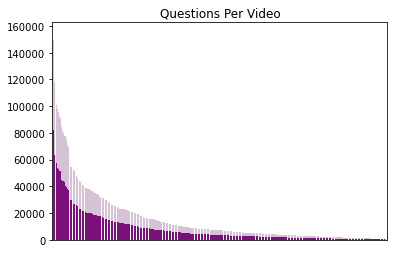

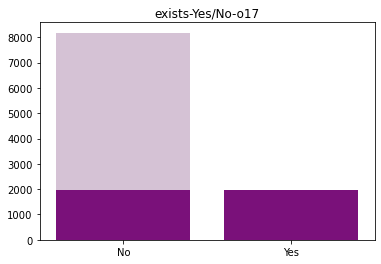

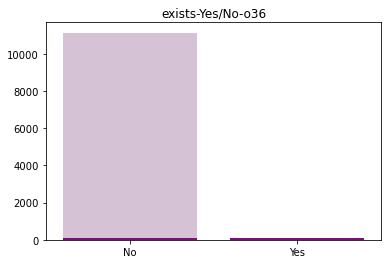

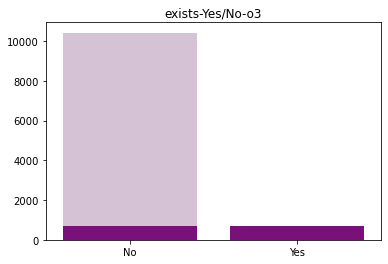

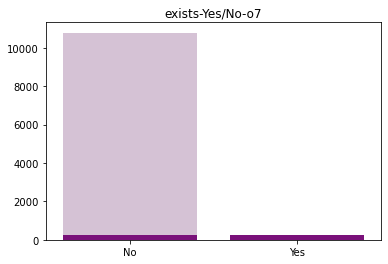

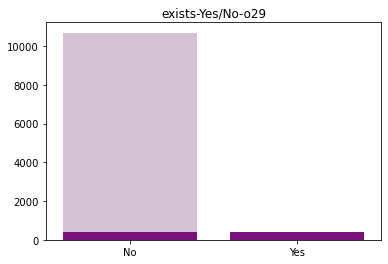

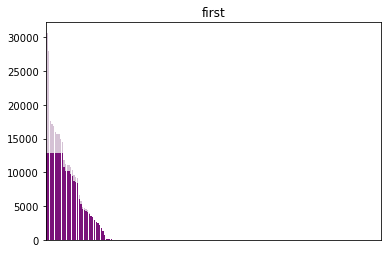

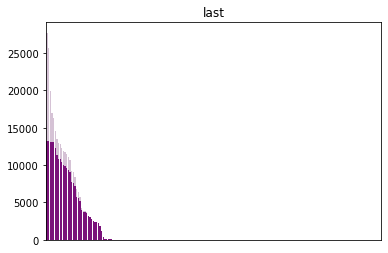

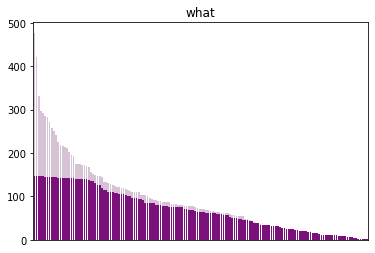

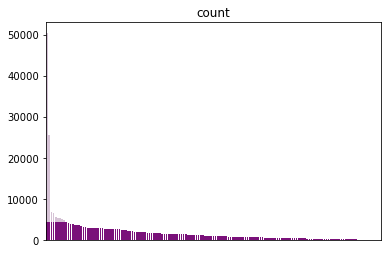

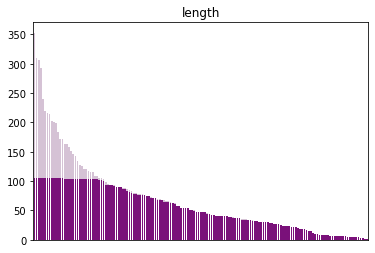

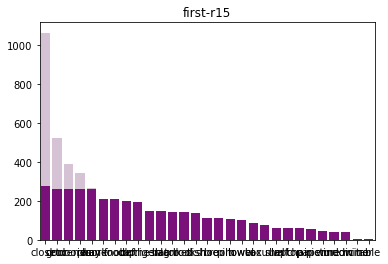

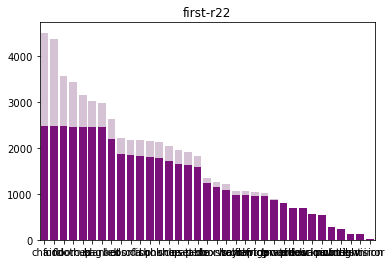

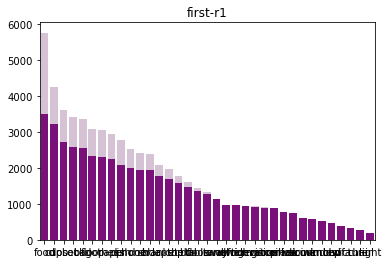

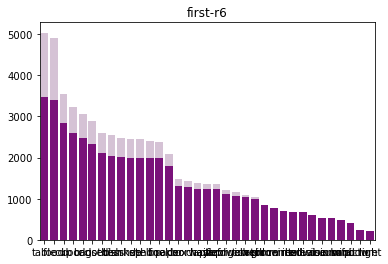

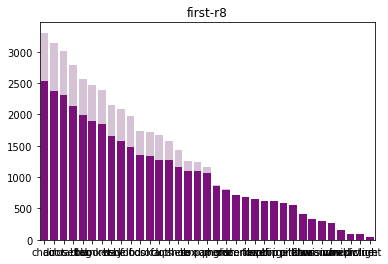

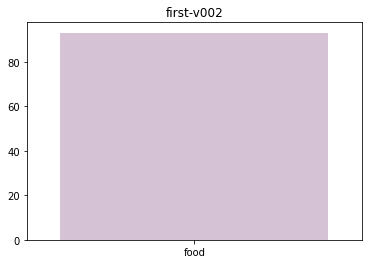

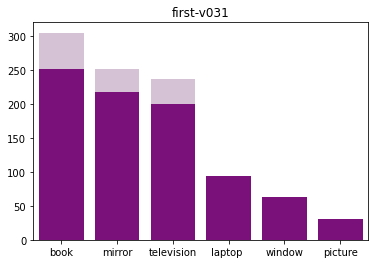

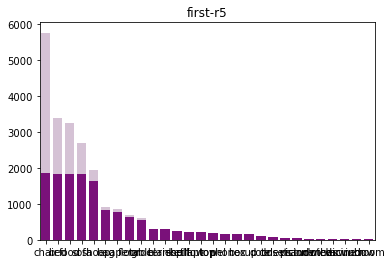

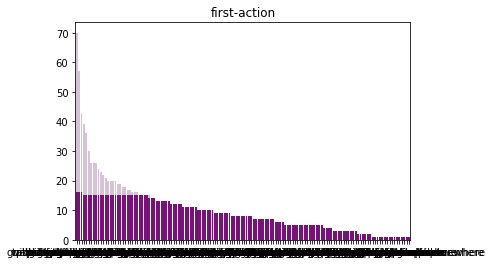

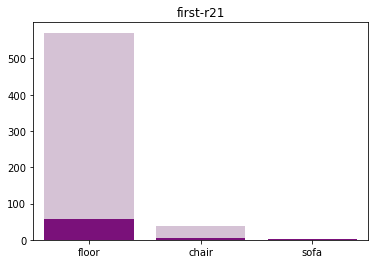

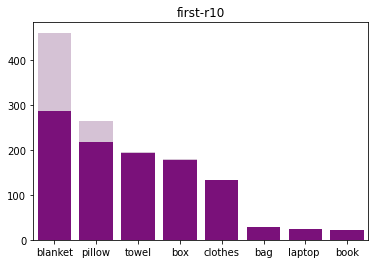

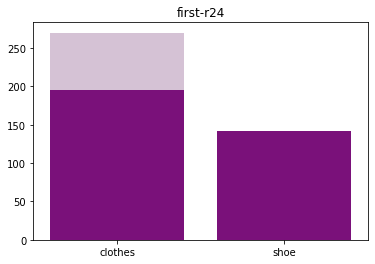

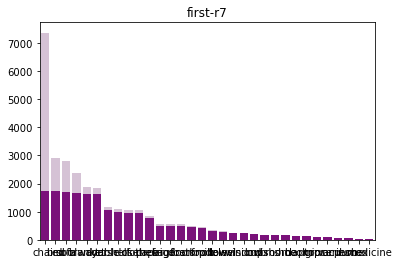

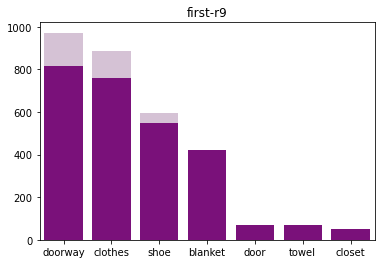

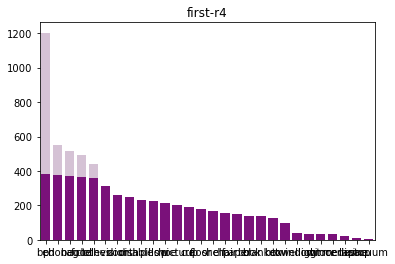

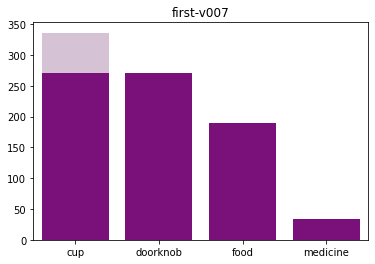

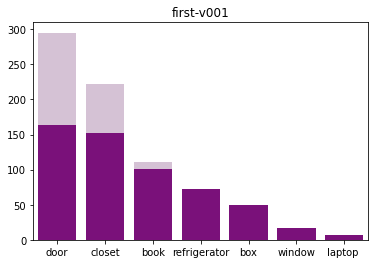

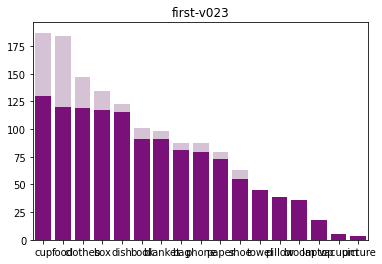

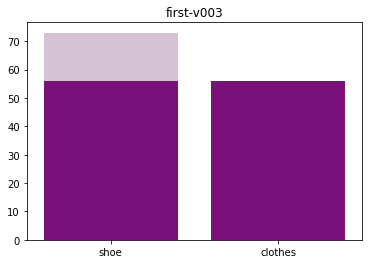

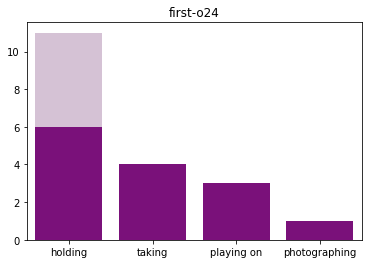

<Figure size 432x288 with 0 Axes>

In [248]:
def getXandYFromDistribution(distr):
    x = []
    y = []
    
    for new_x, new_y in distr:
        x.append(new_x)
        y.append(new_y)
    return x, y


def visualizeDistr(dist_a, dist_b, name, x_axis):
        x_a, y_a = getXandYFromDistribution(dist_a)
        x_b, y_b = getXandYFromDistribution(dist_b)
        visualizeBarPlot(x_a, y_a, name, color_a, x_axis, False)
        visualizeBarPlot(x_b, y_b, name, color_b, x_axis, True)
    
num_to_show_binary = 5
num_to_show_open_loc = 20
num_shown_binary = 0
num_shown_open_loc = 0

for name in balance_dists_paths:
    path_a, path_b = balance_dists_paths[name]
    with open(path_a) as json_file:
        dist_a = json.load(json_file)
    
    with open(path_b) as json_file:
        dist_b = json.load(json_file)
    
    if name == 'QA':
        visualizeDistr(dist_a, dist_b, "Questions Per Video", False)
    
    elif name == 'open_global':
        for category in dist_a:
            visualizeDistr(dist_a[category], dist_b[category], category, False)
            
    
    elif name == 'binary':
        for glob in dist_a:
            for cat in dist_a[glob]:
                for loc in dist_a[glob][cat]:
                    visualizeDistr(dist_a[glob][cat][loc], dist_b[glob][cat][loc], "%s-%s-%s" % (glob, cat, loc), True)
                    num_shown_binary = num_shown_binary + 1
                    if num_to_show_binary <= num_shown_binary:
                        break
                
                if num_to_show_binary <= num_shown_binary:
                    break
     
            if num_to_show_binary <= num_shown_binary:
                break
    
    
    elif name == 'open_local':
        for glob in dist_a:
            for loc in dist_a[glob]:
                visualizeDistr(dist_a[glob][loc], dist_b[glob][loc], "%s-%s" % (glob, loc), True)
                num_shown_open_loc = num_shown_open_loc + 1
                if num_to_show_open_loc <= num_shown_open_loc:
                    break
                
            if num_to_show_open_loc <= num_shown_open_loc:
                break
     
    

In [234]:
templates_a = {}
templates_b = {}
for i in templ_ids:
    templates_a[i] = 0
    templates_b[i] = 0


for v_id in QA_a:
    for q_id in QA_a[v_id]:
        q = QA_a[v_id][q_id]
        t_id = q['attributes']['type']
        templates_a[t_id] = templates_a[t_id] + 1
    


for v_id in QA_b:
    for q_id in QA_b[v_id]:
        q = QA_b[v_id][q_id]
        t_id = q['attributes']['type']
        templates_b[t_id] = templates_b[t_id] + 1

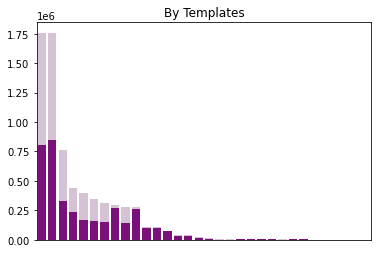

['xorObjRelExists', 'andObjRelExists', 'actExists', 'objRelExists', 'objExists', 'relExists', 'objLastVerify', 'objFirstChoose', 'objFirstVerify', 'objLastChoose', 'actCountChooseFewer', 'actCountChooseMore', 'actCount', 'objFirst', 'objLast', 'objTime', 'relTime', 'actLengthShorterVerify', 'actLengthLongerVerify', 'actLengthShorterChoose', 'actLengthLongerChoose', 'actWhatBetweenWhileStartOneLast', 'actWhatBetweenWhileEndOneFirst', 'actTime', 'actWhatBetweenWhileEndOneLast', 'actWhatBetweenWhileStartOneFirst', 'actFirst', 'actLast', 'actWhatStart', 'actWhatEnd', 'relFirst', 'relLast']


<Figure size 432x288 with 0 Axes>

In [246]:


x_a, y_a = getSortedXandY(templates_a, 0, True, True)
x_b, y_b = getXandYAlreadySorted(x_a, templates_b, 0, True)
visualizeBarPlot(x_a, y_a, "", color_a, False, False)
visualizeBarPlot(x_b, y_b, "By Templates", color_b, False, True)

## Balancing from Before


In [20]:
def deleteFromQA(q_id, QA):
    """ Delete question from the main QA reference dictionary

    Args:
        q_id: the string id of the question to be deleted
    """
    v_id, templ, _ = q_id.split("-")
    del QA[v_id][templ][q_id]


def getDictByAttr(tp, attribute, QA):
    """ Creates a dictionary of all questions
        where the question type has a certain attribute

    Args:
        tp: the string type of question
        attribute: the type of attribute that type is

    Returns:
        A dictinary with all questions of that attribute type
    """

    gl = {}

    for video in QA:
        for templ in QA[video]:
            for q_obj in QA[video][templ]:
                q = QA[video][templ][q_obj]
                if q[tp] != attribute:
                    continue
                ans = q['answer']
                if ans not in gl:
                    gl[ans] = []
                gl[ans].append(q)
    return gl


def getValueCount(dic):
    """ gets count of number of items in each value of a dictionary

    Args:
        dic: a dictionary with iterables as values

    Returns:
        A dictionary mapping keys to the length of their values
    """

    cnt = {}
    for i in dic:
        cnt[i] = len(dic[i])
    return cnt


def sortDictOfCounts(dic):
    """ Sort dictionry with integer values in decreasing order

    Args:
        dic: a dictionary with integer values

    Returns:
        A list of dictionary keys sorted by length #todo: is it a list?
    """
    
    return sorted(dic, key=dic.__getitem__)[::-1]


def createOrigionalDist(counts):
    """ Create a decreasing distribution of counts.

    Args:
        counts: a dictionary mapping keys to a count

    Returns:
        P: a decreasing distribution of counts
        head: zero
        tail: the total number of items in all counts
    """

    sort = sortDictOfCounts(counts)
    P = []
    head = 0  # sum_{j \leq i} c_j
    tail = 0
    for i in sort:
        P.append((i, counts[i]))
        tail = tail + counts[i]
    return P, head, tail


# ok so they don't mention this but I made b dependent on i
def balance(dic, P, head, tail, b, mn, mx, counts, QA):
    """ redistribute weight along answer distribution by downsampling QA

    Args:
        dic: dictionary of all questions with a certain attribute
        P: origional distribution of answers
        head: zero
        tail: total number of questions in dic
        b: parameter for head/tail weight distribution
        mn: minimum proportion for answer_i and answer_i+1
        mx: maximum proportion for answer_i and answer_i+1
        counts: dictionary mapping keys to counts

    Returns:
        A new distribution of counts.
    """

    #print("Len(P) = ", len(P))
    #print("P: ", P)
    largest = P[0][1]
    loop = 0
    for i in range(len(P)):
        #print("in for loop iter " + str(loop))
        #print(P[i])
        loop = loop + 1
        (a, c) = P[i]
        if i + 1 == len(P):
            break

        # adjust head and tail by c
        head = head + c
        tail = tail - c

        # find min/max bound value
        (_, c1) = P[i + 1]
        next_freq = c1 / c

        # find head / tail adjusted by how much they are
        prop = (head / (i + 1)) / (tail / (len(P) - (i + 1)))

        # downsample until head / tail <= b or hit a min/max bound
        cnt = 0
        num_del = 0
        while prop > b:
            #print("prop", prop, " b", b)
            #print(cnt)
            # if its impossible to smooth more without beaking min/max
            #if cnt > 99:
            #    break
            rand_a = random.randint(0, i) #NoteL changed here from (0, i) b/c was always 0. Note: changed back for binary but might be an issue
            rand_c = random.randint(0, largest)
            ds_a, ds_c = P[rand_a]

            # find frequency compared to next highest (to retain distribution)
            #print("rand_a", rand_a, rand_a + 1)
            n_freq = P[rand_a + 1][1] / P[rand_a][1]
            #print(n_freq, " = ", P[rand_a + 1][1], " / ", P[rand_a][1])

            # If deleting instance higher than the number of coutns,
            if n_freq >= mx or n_freq <= mn or ds_c - 1 < rand_c:
                #print("n_freq >= mx ", n_freq >= mx, n_freq, mx, " n_frq <= mn", n_freq <= mn, "ds_c - 1 < rand_c", ds_c - 1 < rand_c)
                cnt = cnt + 1
                continue
            
            #print("AHHHHHHHHHH I MADE IT")
            num_del = num_del + 1
            #print('delete ', num_del)
            deleteFromQA(dic[ds_a][rand_c]['id'], QA)
            del dic[ds_a][rand_c]

            # update all distribution values
            counts[ds_a] = counts[ds_a] - 1

            head = head - 1

            prop = head / tail
            #print("new prop! ", prop)

            P[rand_a] = (ds_a, ds_c - 1)

            if ds_a == a:
                c = P[i][1]
                next_freq = c1 / c  # todo: says not used...
                # todo: when i can visualize, double check
                # diff next_freq and n_freq

            if P[0][1] < largest:
                largest = P[0][1]
    return P  # todo: make p lowercase?


def balanceByAttribute(tp, attr, b, mn, QA):
    """ balances a distribution for questions of a given attribute

    Args:
        tp: the string type of question
        attribute: the type of attribute that type is
        b: parameter for head/tail weight distribution
        mn: minimum proportion for answer_i and answer_i+1

    Returns:
        og_dist: origional answer distribution
        up_dist: updated answer distribution
    """

    print("getDictByAttr")
    dic = getDictByAttr(tp, attr, QA)

    print("getValueCount")
    counts = getValueCount(dic)

    print("createOrigionalDist")
    og_dist, head, tail = createOrigionalDist(counts)
    P = og_dist.copy()
    
    print("balance")
    up_dist = balance(dic, P, head, tail, b, mn, 1, counts, QA)
    return og_dist, up_dist



In [18]:
# get num questions of different types (spend no longer than 30 min)


def notValid(q):
    sp = q['id'].split("-")
    
    if sp[1][3:11] == "Sequence":
        return True
    
    return False
    
    
answers = {}
structurals = {}
semantics = {}
steps = {}

for video in QA:
    for q_obj in QA[video]:
        q = QA[video][q_obj]
        if notValid(q):
            continue
        ans = str(q['answer'])
        struct = q['attributes']['structural']
        sem = q['attributes']['semantic']
            
        if sem == "rel":
            sem == "relation"
            
        step = str(q['steps'])
        #print(q['id'], ans)
            
        if ans not in answers:
            answers[ans] = 0
                
            
        if struct not in structurals:
            structurals[struct] = 0
                
            
        if sem not in semantics:
            semantics[sem] = 0
                
                
        if step not in steps:
            steps[step] = 0
            
        answers[ans] = answers[ans] + 1
        structurals[struct] = structurals[struct] + 1
        semantics[sem] = semantics[sem] + 1
        steps[step] = steps[step] + 1
structurals, semantics, steps

({'verify': 1191794,
  'logic': 1648528,
  'query': 155210,
  'choose': 528773,
  'compare': 241300},
 {'object': 1075598, 'objrel': 1883309, 'relation': 172195, 'action': 634503},
 {'3': 548176,
  '4': 452526,
  '1': 31397,
  '5': 580336,
  '2': 16103,
  '6': 879411,
  '7': 989514,
  '8': 259560,
  '9': 8454,
  '10': 128})

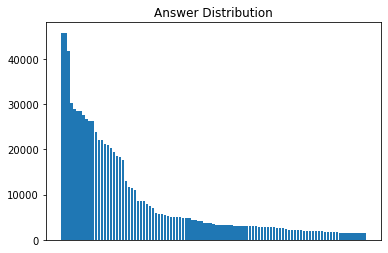

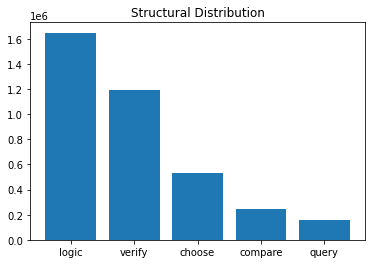

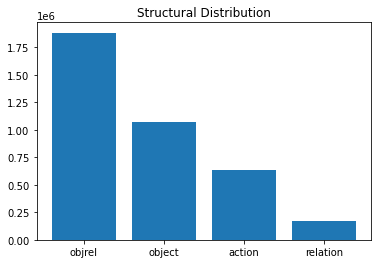

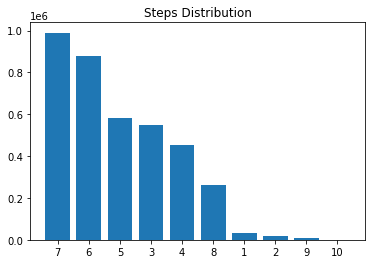

In [21]:
ans_dist, _, _ = createOrigionalDist(answers)
struct_dist, _ , _ = createOrigionalDist(structurals)
sem_dist, _, _ = createOrigionalDist(semantics)
step_dist, _, _ = createOrigionalDist(steps)

visualize.visualize(ans_dist[2:103], None, "Answer Distribution", False, '../figures/dists/answer_dist')

visualize.visualize(struct_dist, None, "Structural Distribution", True, '../figures/dists/struct_dist')

visualize.visualize(sem_dist, None, "Structural Distribution", True, '../figures/dists/sem_dist')

visualize.visualize(step_dist, None, "Steps Distribution", True, '../figures/dists/steps_dist')


# TODO: do yes/no separately

# TODO: turn counting answers into string?

# TODO: change so not a rel and a relation structural distribution

In [ ]:
# So - will need to make balancing make more sense and do it all at once. Probably need to figure that out here
# create dict by attr. all at once too keep for all? or do some sort of pre-processing

In [ ]:
# Need to not do yes/no here!
#indexes = []
#for i in range(len(first_og)):
#    if first_og[i][0] == "No" or first_og[i][0] == "Yes":
#        indexes.append(i)
        
#for i in indexes:
#    del first_og[i]
 #   del first_up[i]

In [ ]:
#num = 10

#visualize.visualize(first_og[:num], first_up[:num], "First")

In [ ]:
#for i in range(len(first_og)):
#    print(first_og[i], first_up[i])

In [ ]:
#for v_id in QA:
#    for temp in QA[v_id]:
#        print(temp)
        #for q_id in QA[v_id][temp]:
            #print(q_id)

In [ ]:
def getBinaryCat(ans):
    if ans == "Yes" or ans == "No":
        return "Yes/No"
    
    if ans == "before" or ans == "after":
        return "before/after"
    
    print("Invalid")
    
def isBinary(quest):
    return quest['attributes']['structural'] == 'verify'
# TODO: maybe add choose to verify?
# TODO: will need to really check tempaltes re correct

def getDictByQType(QA):
    
    opn = {}
    bny = {}
    
# TODO may need to initalize some?

    all_global = ['exists', 'first', 'last', 'what', 'time', 'count', 'length', 'sequence']
    for glob in all_global:
        opn[glob] = {}
        bny[glob] = {}
    
    all_binary_cat = ['Yes/No', 'before/after']
    for glob in bny:
        for cat in all_binary_cat:
            bny[glob][cat] = {}
        
    cnt = 0
    for video in QA:
        cnt = cnt + 1
        for templ in QA[video]:
            for q_obj in QA[video][templ]:
                q = QA[video][templ][q_obj]
                glob = q['global']
                loc = q['local']
                # q_type = q['attributes']['structural']
                
                # TODO: need to fix locals
                if loc[:3] == 'and' or loc[:3] == 'xor':
                    continue
                
                if loc[:1] == "{":
                    continue
                
                if isBinary(q):
                    ans = q['answer']
                    cat = getBinaryCat(ans)
                    if loc not in bny[glob][cat]:
                        if cat == "Yes/No":
                            bny[glob][cat][loc] = {
                                'Yes': [],
                                'No': [],
                            }
                        if cat == "before/after":
                            bny[glob][cat][loc] = {
                                'before': [],
                                'after': [],
                            }
                            
                    
                    #bny[glob][cat][loc][ans][q_obj] = q
                    bny[glob][cat][loc][ans].append(q)
                else: 
                    if loc not in opn[glob]:
                        opn[glob][loc] = {}
                    opn[glob][loc][q_obj] = q
                    
    return bny, opn
    
bny, opn = getDictByQType(QA.copy())

In [ ]:
# for binary, want each to be 50/50
def getBinaryCount(dic):
    """ gets count of number of items in each value of a dictionary

    Args:
        dic: a dictionary with iterables as values

    Returns:
        A dictionary mapping keys to the length of their values
    """

    cnt = {}
    for i in dic:
        cnt[i] = len(dic[i])
    return cnt

def balanceLocalBny(loc_bny, b, mn, QA):
    """ balances a distribution for questions of a given attribute

    Args:
        loc_bin: a dictionary of ids of questions for a local variable

    Returns:
        og_dist: origional answer distribution
        up_dist: updated answer distribution
    """

    #print("getDictByAttr")
    #dic = getDictByAttr(tp, attr, QA)

    #print("getValueCount")
    #counts = getBinaryCount(loc_bny)
    
    counts = getValueCount(loc_bny)
    #print(counts)

    #print("createOrigionalDist")
    og_dist, head, tail = createOrigionalDist(counts)
    P = og_dist.copy()
    print("P", P)
    
    for i in og_dist:
        if i[1] == 0:
            # FOR NOW SKIP, BUT USUALLY DELETE ALL
            return
    
    print("balance")
    og_dist, up_dist = balance(loc_bny, P, head, tail, b, mn, 1, counts, QA)
    print(og_dist, up_dist)
    return og_dist, up_dist

def balanceBinary(bny, QA):
    #bny = bny.copy()
    #og = bny.copy()
    #up = bny.copy()
    #QA2 = QA.copy()
    up = {}
    og = {}
    all_global = ['exists', 'first', 'last', 'what', 'time', 'count', 'length', 'sequence']
    for glob in all_global:
        up[glob] = {}
        og[glob] = {}
    
    all_binary_cat = ['Yes/No', 'before/after']
    for glob in up:
        for cat in all_binary_cat:
            up[glob][cat] = {}
            og[glob][cat] = {}
    
    for glob in bny:
        for cat in bny[glob]:
            for loc in bny[glob][cat]:
                print()
                print(glob, cat, loc)
                og_dist up_dist = balanceLocalBny(bny[glob][cat][loc], 1, 0, QA)
                if up_dist == "illegal":
                    og[glob][cat][loc] = []
                    up[glob][cat][loc] = []
                    continue
                print(og_dist, up_dist)
                og[glob][cat][loc] = og_dist
                up[glob][cat][loc] = up_dist
    # TODO: make sure staying consistent with everything!
    #return QA2
    return up

up = balanceBinary(bny, QA)

In [ ]:
# TODO: some local for and/xor are dictionaries
sec = up['exists']['Yes/No']['o16']
sec2 = bny['exists']['Yes/No']['r1-o16']

print(sec)

In [ ]:
before = og['exists']['Yes/No']['o4']
after = up['exists']['Yes/No']['o4']

print(before, after)

visualize.visualize(before, after, "o16 Exists Yes/No", False, '../figures/dists/exists-yesno-o16')

In [20]:
with open ('../models/hcrn-videoqa/results/expTGIF-QAFrameQA/preds/test_preds.json') as f:
    preds = json.load(f)

v_ids = set()
q_by_v = {}
for pred in preds:
    v_name = pred['video_name']
    v_ids.add(v_name)
    if v_name not in q_by_v:
        q_by_v[v_name] = []
    q_by_v[v_name].append(pred)
    
v_ids

{'JMCBE',
 'BIQGN',
 '5B9XE',
 'X4BQG',
 'GQ341',
 'RJD1Z',
 'GIIF8',
 'GY8P2',
 'EDSUD',
 'EFUTW',
 'QQGU3',
 '3LN8C',
 '8XXNK',
 '8D6PU',
 '0Z1PC',
 'PAS7F',
 '7614L',
 'LD9EC',
 'OQSXX',
 '5UNMN',
 'XPXWY',
 'D6J8Q',
 '2U3X0',
 'ZPRJH',
 'U8M2P',
 'ZJRCS',
 'BIJYC',
 'MUQBW',
 'JR6VG',
 'FOMJM',
 '0HR01',
 'U7AAB',
 '3G991',
 'QMIKJ',
 'RGNQD',
 'HXR3Z',
 'E0OJ8',
 'USPJK',
 'ICQZX',
 'ZDV60',
 'TAQ25',
 'EEGGA',
 'ALJ7B',
 '52KNA',
 'MSACP',
 '43CCM',
 'GM3UK',
 'IDXM0',
 'E6RD3',
 '41A89',
 'A7WU3',
 'Z6B6S',
 'KF08J',
 'GF7DV',
 'VFAE3',
 'AHBE8',
 '35ZZP',
 '4KYZH',
 'JZ45I',
 'CC0PK',
 '8LVCL',
 'MIAE4',
 'F024X',
 'UUF84',
 'OIL1V',
 'DPB7X',
 '30K2N',
 '7XMBM',
 'ZB5J4',
 'NI15V',
 '735W9',
 'XE19C',
 'BYP85',
 '448J4',
 'LWRKS',
 '93HQR',
 'LQC89',
 'DUZDL',
 'VXJS4',
 '8NEYJ',
 'IALUY',
 'IV1S7',
 'WK9HE',
 'PSAVM',
 'GHJ3Q',
 'AOK1L',
 'DGHSW',
 'L2502',
 'RT1JY',
 'ZBBOO',
 'TRVEA',
 '6UU5T',
 '83JOK',
 'RDVGK',
 'IFRT0',
 'SRTX6',
 'KE5EM',
 'KT2SV',
 'J3RP9',
 'O3HV7',


In [21]:
len(v_ids)

1726